In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
# Assign spreadsheet filename to `file`
file = 'iris.xlsx'
df = pd.read_excel (file) # becomes a weird multiindex stuff with a bunch of NaN's in the leftnmost column so need the following line
# # Load spreadsheet
# iris_xl = pd.ExcelFile(file)

# # Print the sheet names
# print(iris_xl.sheet_names)

# Load a sheet into a DataFrame by name: df1
#iris_df = iris_xl.parse('Sheet1')
iris_df = pd.DataFrame(df,columns = ['sepal_length','sepal_width','petal_length','petal_width','label']) # 150 x 5

In [41]:
iris_df.head()

In [42]:
iris_df.label.value_counts()

In [43]:
iris_df.shape

In [105]:
## Getting the min, max, mean, variance
'/***********************************************/'
sepal_length_min = iris_df.sepal_length.min()
sepal_length_max = iris_df.sepal_length.max()
sepal_length_mean = iris_df.sepal_length.mean()
sepal_length_var = iris_df.sepal_length.var()
'/***********************************************/'
sepal_width_min = iris_df.sepal_width.min()
sepal_width_max = iris_df.sepal_width.max()
sepal_width_mean = iris_df.sepal_width.mean()
sepal_width_var = iris_df.sepal_width.var()
'/***********************************************/'
petal_length_min = iris_df.petal_length.min()
petal_length_max = iris_df.petal_length.max()
petal_length_mean = iris_df.petal_length.mean()
petal_length_var = iris_df.petal_length.var()
'/***********************************************/'
petal_width_min = iris_df.petal_width.min()
petal_width_max = iris_df.petal_width.max()
petal_width_mean = iris_df.petal_width.mean()
petal_width_var = iris_df.petal_width.var()
'/***********************************************/'

'/***********************************************/'

In [106]:
info = iris_df.describe()
info.loc['var'] = iris_df[['sepal_length','sepal_width','petal_length','petal_width']].apply(np.var,axis = 0) # need .loc to specify it's a new row, axis = 0 applies to entire cols

In [107]:
info

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
var,0.681122,0.188713,3.095503,0.577133


In [108]:
## Stats grouped by each class
grouped = iris_df.groupby(['label']).describe()
grouped['petal_length','var'] = iris_df.groupby(['label']).var()['petal_length'].values
grouped['petal_width','var'] = iris_df.groupby(['label']).var()['petal_width'].values
grouped['sepal_length','var'] = iris_df.groupby(['label']).var()['sepal_length'].values
grouped['sepal_width','var'] = iris_df.groupby(['label']).var()['sepal_width'].values
grouped = grouped.T # Comes out 3 by 32 so we wanted 32 by 3

grouped

label                  setosa  versicolor  virginica
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length var     0.030159    0.220816   0.304588
petal_width  var     0.011106    0.039106   0.075433
sepal_length var     0.124249    0.266433   0.404343
sepal_width  var     0.143690    0.098469   0.104004

In [67]:
## Within class variance
sepal_length_sw = (grouped.loc['sepal_length','count']/150 * grouped.loc['sepal_length','var']).sum()
sepal_width_sw = (grouped.loc['sepal_width','count']/150 * grouped.loc['sepal_width','var']).sum()
petal_length_sw = (grouped.loc['petal_length','count']/150 * grouped.loc['petal_length','var']).sum()
petal_width_sw = (grouped.loc['petal_width','count']/150 * grouped.loc['petal_width','var']).sum()
print(sepal_length_sw, sepal_width_sw, petal_length_sw, petal_width_sw)

0.2650081632653061 0.1153877551020408 0.18518775510204083 0.04188163265306124


In [69]:
## Between class variance
sepal_length_sb = (grouped.loc['sepal_length','count']/150 * (grouped.loc['sepal_length','mean'] - sepal_length_mean) ** 2).sum()
sepal_width_sb = (grouped.loc['sepal_width','count']/150 * (grouped.loc['sepal_width','mean'] - sepal_width_mean)**2).sum()
petal_length_sb = (grouped.loc['petal_length','count']/150 * (grouped.loc['petal_length','mean'] - petal_length_mean)**2).sum()
petal_width_sb = (grouped.loc['petal_width','count']/150 * (grouped.loc['petal_width','mean'] - petal_width_mean)**2).sum()
print(sepal_length_sb, sepal_width_sb, petal_length_sb, petal_width_sb)

0.42141422222222125 0.07563288888888878 2.9140186666666668 0.536088888888889


In [89]:
iris_new = iris_df.replace({'setosa':1,'versicolor':2,'virginica':3}) # Replace labels

In [46]:
## Correlation matrix
corr = iris_new.corr()
iris_new.head()

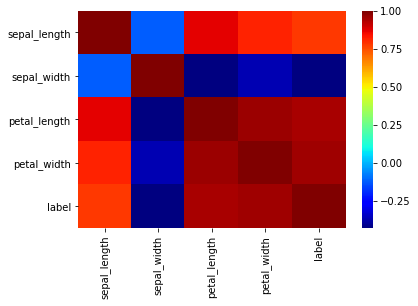

In [91]:
sns.heatmap(corr,cmap='jet')

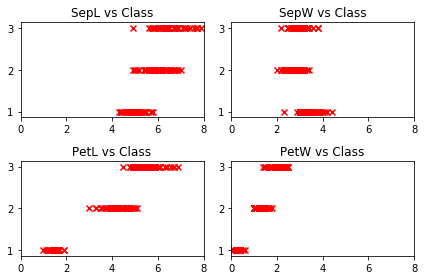

In [97]:
plt.subplot(221)
plt.scatter(iris_new['sepal_length'],iris_new['label'],marker='x',c='r')
plt.title('SepL vs Class')
plt.xlim([0,8])
plt.subplot(222)
plt.scatter(iris_new['sepal_width'],iris_new['label'],marker='x',c='r')
plt.title('SepW vs Class')
plt.xlim([0,8])
plt.subplot(223)
plt.scatter(iris_new['petal_length'],iris_new['label'],marker='x',c='r')
plt.title('PetL vs Class')
plt.xlim([0,8])
plt.subplot(224)
plt.scatter(iris_new['petal_width'],iris_new['label'],marker='x',c='r')
plt.title('PetW vs Class')
plt.xlim([0,8])

plt.tight_layout() # To make sure there is gap between the plots

In [109]:
def standardize(col):
    return (col-col.mean())/col.std()

# Setosa vs Rest Classification using all features

In [110]:
iris_setosa = iris_df.copy()
iris_setosa['label'] = iris_setosa.label.replace({'setosa':1,'virginica':0,'versicolor':0})
iris_setosa[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = iris_setosa[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].apply(standardize,axis = 0)


In [47]:
# iris_setosa.head()

In [7]:
iris_setosa = iris_setosa.iloc[np.random.permutation(len(df))]

In [48]:
# iris_setosa.head()

## Batch Perceptron learning

In [52]:
np.random.seed(42)
w_ini = np.random.randn(5,)
learning_rate = 0.001

In [111]:
X = iris_setosa[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_setosa[['label']].values

In [56]:
#y = y.T
X_copy = np.copy(X)
X_copy = X_copy.T # Making X_copy 5 by 150
print(X_copy.shape)
X_copy = np.vstack([X_copy,np.ones((1,X_copy.shape[1]))]) #X_copy 6 x 150
X_copy[:,y[:,0] == 0] = X_copy[:,y[:,0] == 0] *(-1)

(4, 150)


In [57]:
w = w_ini
w

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337])

In [58]:
c = 0
while True:
    c += 1
    res = np.dot(w,X_copy[:,:])
    indices = np.where(res <= 0)[0]
    #print(indices)
    if len(indices) == 0: break
    wrongs = X_copy[:,indices]
    summed = np.sum(wrongs,axis=1)
    w = w + learning_rate*summed
    #print(summed)
print(w)
print(c)

[-0.39844382  0.25974767 -0.4282713   0.42818761 -0.27915337]
24


In [114]:
X = X.T # making 5x150. So we can use to calculate preds
X = np.vstack([X,np.ones((1,X.shape[1]))])
results = np.dot(w,X) #(5,) with (5,150)

NameError: name 'w' is not defined

In [60]:
y = y.T # Need this for line below to check classification accuracy

In [51]:
# (results > 0) == (y == 1)

# Least squares approach

In [116]:
y.shape

(150, 1)

In [117]:
X = X.T # making 150x5
#y = y.T # same as above
W = np.matmul(np.linalg.pinv(X),y)
print(W)

[[ 0.05467702]
 [ 0.1058492 ]
 [-0.39658681]
 [-0.04380788]
 [ 0.33333333]]


In [62]:
results2 = np.dot(X,W)

In [101]:
W.shape

(5, 1)

In [65]:
((results2 < 0) == (y == 1)).sum()

54

## 54 misclassifications

# Setosa vs Rest using features 3 & 4

In [67]:
iris_setosa_2 = iris_df[['petal_length','petal_width','label']].copy()
iris_setosa_2['label'] = iris_setosa_2.label.replace({'setosa':1,'virginica':0,'versicolor':0})
iris_setosa_2[['petal_length', 'petal_width']] = iris_setosa_2[['petal_length', 'petal_width']].apply(standardize,axis = 0)


In [68]:
iris_setosa_2 = iris_setosa_2.iloc[np.random.permutation(len(df))] # Shuffle indices

In [118]:
X2 = iris_setosa_2[['petal_length', 'petal_width']].values
y2 = iris_setosa_2[['label']].values

In [70]:
X2_copy = np.copy(X2)
X2_copy = X2_copy.T
#print(X_copy.shape)
X2_copy = np.vstack([X2_copy,np.ones((1,X2_copy.shape[1]))])
X2_copy[:,y2[:,0] == 0] = X2_copy[:,y2[:,0] == 0] *(-1)

In [73]:
np.random.seed(42)
w2 = np.random.randn(3,)

In [74]:
c = 0
while True:
    c += 1
    res = np.dot(w2,X2_copy[:,:])
    indices = np.where(res <= 0)[0]
    #print(indices)
    if len(indices) == 0: break
    wrongs = X2_copy[:,indices]
    summed = np.sum(wrongs,axis=1)
    w2 = w2 + learning_rate*summed
    #print(summed)
print(w2)
print(c)

[ 0.12445751 -0.42127489 -0.13431146]
40


In [119]:
X2 = X2.T # making 5x150
X2 = np.vstack([X2,np.ones((1,X2.shape[1]))])
results2 = np.dot(w2,X2)
y2 = y2.T

In [120]:
((results2>0) == (y2==1)).sum()

150

In [121]:
X2 = X2.T # making 150x5
y2 = y2.T # same as above
W2 = np.matmul(np.linalg.pinv(X2),y2)
print(W2)

[[-0.44367073]
 [ 0.00749604]
 [ 0.33333333]]


In [123]:
results2_LS = np.dot(X2,W2)
((results2_LS  < 0) == (y2 == 1)).sum()

64

In [99]:
W2.shape

(3,)

In [87]:
X2 = X2.T

In [91]:
y2 = y2.T

In [90]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
xx,yy = make_meshgrid(X2[0,:],X2[1,:]) # We switched X2 back again to 3x150 for it to work here

X_mesh = np.vstack([xx.ravel().T,yy.ravel().T,np.ones(xx.shape[0]*xx.shape[1])]) #3 by xx.shape[0]*xx.shape[1]
X_mesh.shape
clf = np.dot(w2,X_mesh) #(xx.shape[0]*xx.shape[1],)

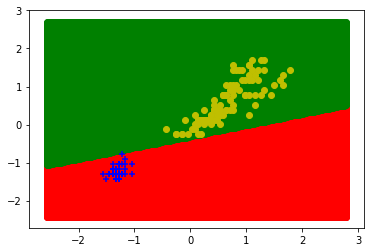

In [94]:
plt.scatter(X_mesh[0,clf > 0],X_mesh[1,clf > 0],c='r')
plt.scatter(X_mesh[0,clf <= 0],X_mesh[1,clf <= 0],c='g')
plt.scatter(X2[0,y2[0]==1],X2[1,y2[0]==1],c='b',marker="+") #Since y is 2D need y[0] is used y2 then could have done y==1
plt.scatter(X2[0,y2[0]==0],X2[1,y2[0]==0],c='y',marker="o")

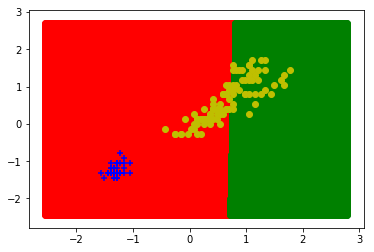

In [97]:
W2 = W2.reshape(3,) # Got from LS
clf2 = np.dot(W2,X_mesh)
plt.scatter(X_mesh[0,clf2 > 0],X_mesh[1,clf2 > 0],c='r')
plt.scatter(X_mesh[0,clf2 <= 0],X_mesh[1,clf2 <= 0],c='g')
plt.scatter(X2[0,y2[0]==1],X2[1,y2[0]==1],c='b',marker="+") #Since y is 2D need y[0] is used y2 then could have done y==1
plt.scatter(X2[0,y2[0]==0],X2[1,y2[0]==0],c='y',marker="o")